In [1]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout,Flatten,MaxPooling2D,Conv2D
from keras.utils import to_categorical,plot_model


Using TensorFlow backend.


In [2]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data('C:/Users/c3000094/Downloads/mnist.npz')

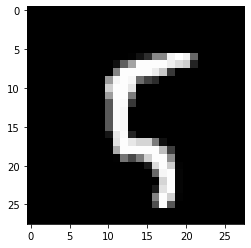

In [3]:
plt.imshow(x_train[100],cmap = 'gist_gray')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
unique , counts = np.unique(y_train,return_counts = True)
print('Train data : ',dict(zip(unique,counts)))

Train data :  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
unique , counts = np.unique(y_test,return_counts = True)
print('Test data : ',dict(zip(unique,counts)))

Test data :  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [7]:
#compute the number of labels
num_label = len(np.unique(y_train)) #10 labels
print(num_label)

10


In [8]:
y = len(np.unique(y_test))
print(y)

10


In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
#resize and normalize
x_train = x_train.reshape(60000,28,28,1).astype('float32')/255
x_test = x_test.reshape(10000,28,28,1).astype('float32')/255

In [11]:
#convert vector
n_class = 10
y_train = to_categorical(y_train,n_class)
y_test = to_categorical(y_test,n_class)


In [12]:
y_train[4545]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [13]:
#model MLP 3 layer
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (28,28,1)))

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense((128),activation='relu'))
model.add(Dropout((0.5)))

model.add(Dense(n_class,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
#loss,optimazation,accurancy
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train , epochs = 15 , batch_size =128)
score =model.evaluate(x_test,y_test ,batch_size = 128)
print("ACCURANCY : " + str(score[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





60000/60000 [==============================] - 49s 816us/step - loss: 0.2427 - acc: 0.9268
Epoch 2/15
60000/60000 [==============================] - 49s 820us/step - loss: 0.0804 - acc: 0.9755
Epoch 3/15
60000/60000 [==============================] - 50s 836us/step - loss: 0.0613 - acc: 0.9816
Epoch 4/15
60000/60000 [==============================] - 49s 819us/step - loss: 0.0527 - acc: 0.9842
Epoch 5/15
60000/60000 [==============================] - 50s 827us/step - loss: 0.0435 - acc: 0.98651s - loss: 0.0436
Epoch 6/15
60000/60000 [==============================] - 49s 818us/step - loss: 0.0362 - acc: 0.9885
Epoch 7/15
60000/60000 [==============================] - 50s 832us/step - loss: 0.0337 - acc: 0.9894
Epoch 8/15
60000/60000 [==============================] - 50s 841us/step - loss: 0.0311 - acc: 0.9899
Epoch 9/15
60000/60000 [==============================] - 51s 858

In [16]:
#score =model.evaluate(x_test,y_test ,batch_size = 128)
#print("ACCURANCY : " + str(score[1]*100))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [19]:
model.save('model_tensorflow/modelTf.h5')